In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

In [4]:
# Carregar o modelo treinado
# Substitua pelo caminho do seu melhor modelo salvo
model = YOLO('runs/detect/train/weights/best.pt')

In [5]:
# Função para fazer predições em uma imagem
def predict_image(image_path):
    # Fazer a predição
    results = model.predict(image_path, conf=0.25)  # conf é o threshold de confiança
    
    # Carregar e converter a imagem
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Pegar o resultado da primeira imagem
    result = results[0]
    
    # Desenhar as detecções
    for box in result.boxes:
        # Coordenadas da box
        x1, y1, x2, y2 = box.xyxy[0]
        
        # Classe e confiança
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        
        # Nome da classe (ajuste conforme suas classes)
        class_names = ['buffalo', 'elephant', 'rhino', 'zebra']
        label = f"{class_names[cls]}: {conf:.2f}"
        
        # Desenhar retângulo e texto
        cv2.rectangle(img, 
                     (int(x1), int(y1)), 
                     (int(x2), int(y2)), 
                     (0, 255, 0), 2)
        cv2.putText(img, label, 
                   (int(x1), int(y1-10)), 
                   cv2.FONT_HERSHEY_SIMPLEX, 
                   0.9, (0, 255, 0), 2)
    
    # Mostrar imagem
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()




image 1/1 g:\Meu Drive\DIO\Projetos\dio-yolo-segmentacao-treinamento\predict\elefante.jpeg: 480x640 2 elephants, 97.0ms
Speed: 3.9ms preprocess, 97.0ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


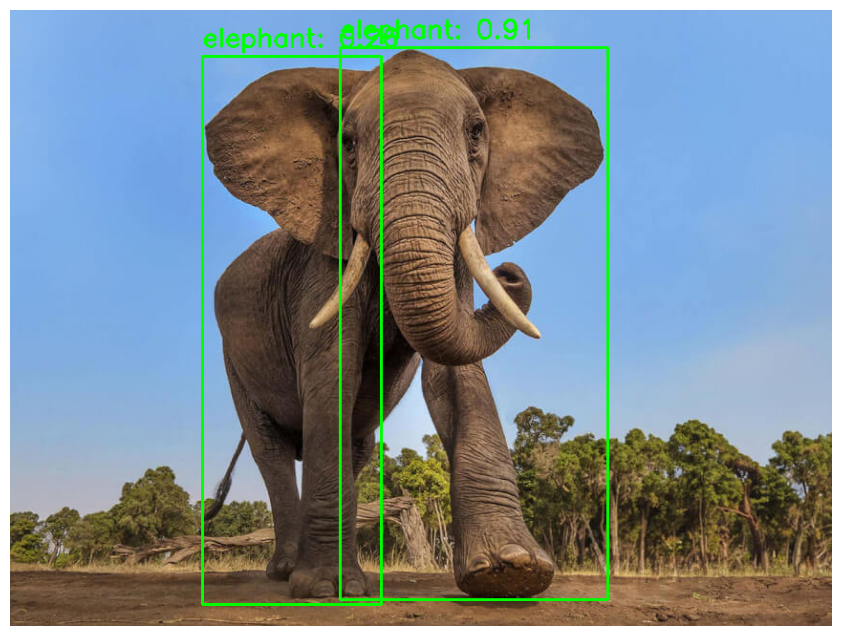

In [6]:
# Testar com uma nova imagem
predict_image('predict/elefante.jpeg')